# Regresión lineal: Normalización
M2U3 - Ejercicio 1

## ¿Qué vamos a hacer?
- Crear un dataset sintético con características en diferentes rangos de valores
- Entrenar un modelo de regresión lineal sobre el dataset original
- Normalizar el dataset original
- Entrenar otro modelo de regresión lineal sobre el dataset normalizado
- Comparar el entrenamiento de ambos modelos, normalizado y no normalizado

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

In [38]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Creación del dataset sintético


Crea un dataset sintético con un término de error del 10% del valor sobre *Y* y una *X* en apróx. el rango (-1, 1)

In [23]:
# TODO: Copia el código de ejercicios anteriores para generar un dataset con término de bias y error

m = 1000
n = 4

X = np.random.uniform(-1, 1, size=(m, n))

X = np.insert(X, 0, values=np.ones(m), axis=1)

Theta_verd = np.random.rand(n + 1)

Y = np.matmul(X, Theta_verd)

# Error aleatorio relativo
error = 0.1
ruido = np.random.normal(0, error * np.abs(Y))
Y_final = Y + ruido

# Comprobaciones
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)

print('\nPrimeras 10 filas de X:')
print(X[:10, :])

print('\nPrimeros 10 valores de Y_final (con error 10%):')
print(Y_final[:10])

print('\nDimensiones de X e Y:')
print(X.shape, Y.shape, Y_final.shape)


Theta a estimar y sus dimensiones:
[0.26104481 0.73846368 0.56543183 0.4914353  0.11154023]
(5,)

Primeras 10 filas de X:
[[ 1.         -0.57008122  0.63068243  0.55370581 -0.6946003 ]
 [ 1.          0.61398896 -0.70688582 -0.17345342 -0.28880188]
 [ 1.         -0.51126461 -0.4503194   0.11614436  0.85609452]
 [ 1.          0.57622853 -0.36677762 -0.31245561 -0.41537159]
 [ 1.         -0.31472291 -0.66603592 -0.24588999 -0.36347123]
 [ 1.          0.90843548  0.6317844   0.13794607 -0.89863915]
 [ 1.         -0.30281805 -0.76466929  0.73164187  0.21904843]
 [ 1.          0.9352238   0.05536824  0.6054526   0.49516185]
 [ 1.         -0.54734406  0.38239318  0.98570176  0.39801513]
 [ 1.         -0.93425123  0.21254096  0.56682273  0.30723455]]

Primeros 10 valores de Y_final (con error 10%):
[ 0.44946284  0.20560371 -0.19890547  0.27704983 -0.49860268  1.26201141
 -0.01433333  1.18823636  0.548224    0.00420433]

Dimensiones de X e Y:
(1000, 5) (1000,) (1000,)


Ahora vamos a modificar el dataset para asegurarnos de que cada característica, cada columna de *X*, tiene un órden de magnitud y una media diferente.

Para ello, multiplica cada columna de *X* (excepto la primera, el bias, que debe ser todo 1.) por un rango diferente y súmale un valor de bias diferente.

El valor que sumamos luego resultará la media de dicha característica o columna, y el valor por el que multliplicamos su rango o escala.

P. ej., $X_1 = X_1 * 10^3 + 3.1415926$, donde `10^3` será la media y `3,1415926` la escala de la característica.

In [24]:
# TODO: Para cada columna de X, multiplícala por un rango de valores y súmale una media diferente


# Los arrays de rangos y medias tienen que ser de longitud n
# Crea un array con los rangos de valores, p. ej.: 1e0, 1e3, 1e-2, 1e5
rangos = np.array([1e3, 1e-2, 1e2, 1e2])


medias = np.array([3, 20, 5, 4])

for i in range(n):
    X[:, i+1] = X[:, i+1] * rangos[i] + medias[i]


print('X con medias y escalas diferentes')
print(X)
print(X.shape)

X con medias y escalas diferentes
[[   1.         -567.08122352   20.00630682   60.37058106  -65.46003032]
 [   1.          616.98896493   19.99293114  -12.34534174  -24.88018834]
 [   1.         -508.26461177   19.99549681   16.61443645   89.60945198]
 ...
 [   1.         -355.37722764   19.99934039   58.91259174  -67.75985246]
 [   1.         -858.89495393   19.99659928   92.0911883    67.31602157]
 [   1.         -423.16164054   19.99955818  -46.08836097   44.54536272]]
(1000, 5)


Recuerda que puedes ejecutar celdas de Jupyter en un orden distinto a su posición en el documento. Los corchetes a la izquierda de las celdas marcarán el órden de ejecución, y las variables mantendrán en todo momento sus valores tras la última celda ejecutada, **¡cuidado!**.

## Entrenamiento y evaluación del modelo

Vamos a volver a entrenar un modelo de regresión lineal. En esta ocasión, vamos a entrenarlo primero sobre el dataset original, sin normalizar, y luego reentrenarlo sobre el dataset ya normalizado, para comparar ambos modelos y procesos de entrenamiento y ver los efectos de la normalización.

Para ello debes copiar las celdas o el código de ejercicios anteriores y entrenar un modelo de regresión lineal multivariable, optimizado por gradient descent, sobre el dataset original.

También debes copiar las celdas que comprueban el entrenamiento del modelo, representando la función de coste vs el nº de iteraciones.

No es necesario que hagas predicciones sobre estos datos ni evalues los residuos del modelo. Para compararlos, lo haremos únicamente a través del coste final.

Nº máx. de iteraciones alcanzado


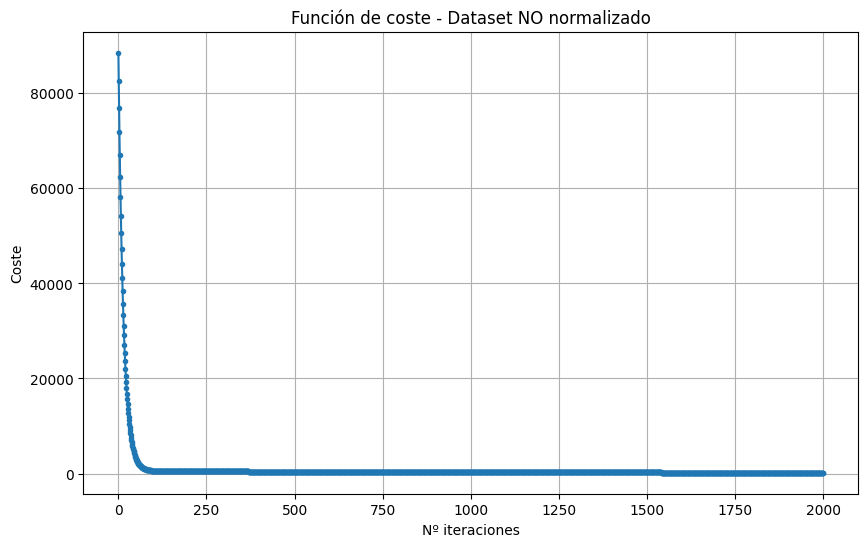

In [33]:
# TODO: Implementa la función de coste vectorizada siguiendo la siguiente plantilla
def cost_function(x, y, theta):
    """Computa la función de coste de manera vectorizada.

    Argumentos:
    x -- array 2D de Numpy, tamaño m x n
    y -- array 1D de Numpy, tamaño m
    theta -- array 1D de Numpy, tamaño n

    Devuelve:
    j -- float con el coste para theta
    """
    # número de ejemplos
    m = x.shape[0]

    # asegurar que theta sea un vector columna (n x 1) para multiplicación matricial
    theta = theta.reshape(-1, 1)  # ahora es n x 1

    # predecir todas las Y usando multiplicación matricial
    h = np.matmul(x, theta)

    # convertir y en vector columna si es necesario
    y = y.reshape(-1, 1)  # m x 1

    # calcular residuos (diferencia entre predicción y valores reales)
    residuos = h - y  # m x 1

    # elevar al cuadrado y sumar todos los residuos
    suma_cuadrados = np.sum(residuos**2)

    # coste final según la fórmula J(theta) = 1/(2*m) * sum((h-y)^2)
    j = suma_cuadrados / (2*m)

    # asegurar que devuelva float y no array 2D
    return float(j)

def gradient_descent(x, y, theta, alpha, e=1e-6, iter_=1000):
    iter_ = int(iter_)
    m, n = x.shape

    # Inicializa theta para el dataset no normalizado
    theta_no_norm = theta.copy()

    # Histórico de costes
    j_hist_no_norm = []

    for k in range(iter_):
        # Copia de theta para actualizar en esta iteración
        theta_iter = theta_no_norm.copy()

        for j in range(n):
            h = np.matmul(x, theta_no_norm)
            grad = (1/m) * np.sum((h - y) * x[:, j])
            theta_iter[j] = theta_no_norm[j] - alpha * grad

        # Actualiza theta para la siguiente iteración
        theta_no_norm = theta_iter

        cost = cost_function(x, y, theta_no_norm)
        j_hist_no_norm.append(cost)

        if k > 0 and abs(j_hist_no_norm[-1] - j_hist_no_norm[-2]) < e:
            print('Converge en la iteración nº: ', k)
            break
    else:
        print('Nº máx. de iteraciones alcanzado')

    return j_hist_no_norm, theta_no_norm

# Parámetros de entrenamiento
alpha = 1e-7
e = 1e-3
iter_ = 2000



# Entrenamiento con dataset no normalizado
j_hist_no_norm, theta_final_no_norm = gradient_descent(X, Y, Theta_verd, alpha, e=e, iter_=iter_)

# Representación gráfica
plt.figure(figsize=(10, 6))
plt.title('Función de coste - Dataset NO normalizado')
plt.xlabel('Nº iteraciones')
plt.ylabel('Coste')

plt.plot(range(len(j_hist_no_norm)), j_hist_no_norm, marker='o', linestyle='-', markersize=3)
plt.grid()
plt.show()


## Normalización de los datos

Vamos a normalizar los datos del dataset original.

Para ello, vamos a crear una función de normalización que aplique la transformación necesaria, según la fórmula:

$x_j = \frac{x_j - \mu_{j}}{\sigma_{j}}$

In [34]:
# TODO: Implementa una función de normalización a un rango común y con media 0

def normalize(x, mu, std):
    """ Normaliza un dataset con ejemplos X

    Argumentos posicionales:a
    x -- array 2D de Numpy con los ejemplos, sin término de bias
    mu -- vector 1D de Numpy con la media de cada característica/columna
    std -- vector 1D de Numpy con la desviación típica de cada característica/columna

    Devuelve:
    x_norm -- array 2D de Numpy con los ejemplos, con sus características normalizadas
    """
    x_norm = (x - mu) / std
    return x_norm


In [42]:
# TODO: Normaliza el dataset original usando tu función de normalización

# Halla la media y la desviación típica de las características de X (columnas), excepto la primera (bias)
mu = np.mean(X[:, 1:], axis=0)
std = np.std(X[:, 1:], axis=0)

print('X original:')
print(X)
print(X.shape)

print('Media y desviación típica de las características:')
print(mu)
print(mu.shape)
print(std)
print(std.shape)

print('X normalizada:')
X_norm = np.copy(X)
X_norm[:, 1:] = normalize(X[:, 1:], mu, std)    # Normaliza sólo la columna 1 y siguientes, no la 0
print(X_norm)
print(X_norm.shape)


X original:
[[   1.         -567.08122352   20.00630682   60.37058106  -65.46003032]
 [   1.          616.98896493   19.99293114  -12.34534174  -24.88018834]
 [   1.         -508.26461177   19.99549681   16.61443645   89.60945198]
 ...
 [   1.         -355.37722764   19.99934039   58.91259174  -67.75985246]
 [   1.         -858.89495393   19.99659928   92.0911883    67.31602157]
 [   1.         -423.16164054   19.99955818  -46.08836097   44.54536272]]
(1000, 5)
Media y desviación típica de las características:
[ 0.84542949 19.99996455  7.85727803  6.70514008]
(4,)
[5.88269055e+02 5.75530652e-03 5.69365508e+01 5.70262819e+01]
(4,)
X normalizada:
[[ 1.         -0.9654199   1.10198728  0.92231268 -1.26547213]
 [ 1.          1.0473839  -1.22207357 -0.3548269  -0.55387319]
 [ 1.         -0.8654374  -0.7762825   0.15380557  1.45379129]
 ...
 [ 1.         -0.60554376 -0.10844871  0.89670542 -1.30580129]
 [ 1.         -1.46147477 -0.58472428  1.47943472  1.06285873]
 [ 1.         -0.72077065 -

## Reentrenamiento del modelo y comparación de resultados

Ahora reentrena el modelo sobre el dataset normalizado. Comprueba el coste final y la iteración en la que ha convergido.

Para ello, puedes volver a las celdas de entrenar el modelo y comprobar la evolución de la función de coste y modificar la *X* utilizada por *X_norm*.



Converge en la iteración nº:  14


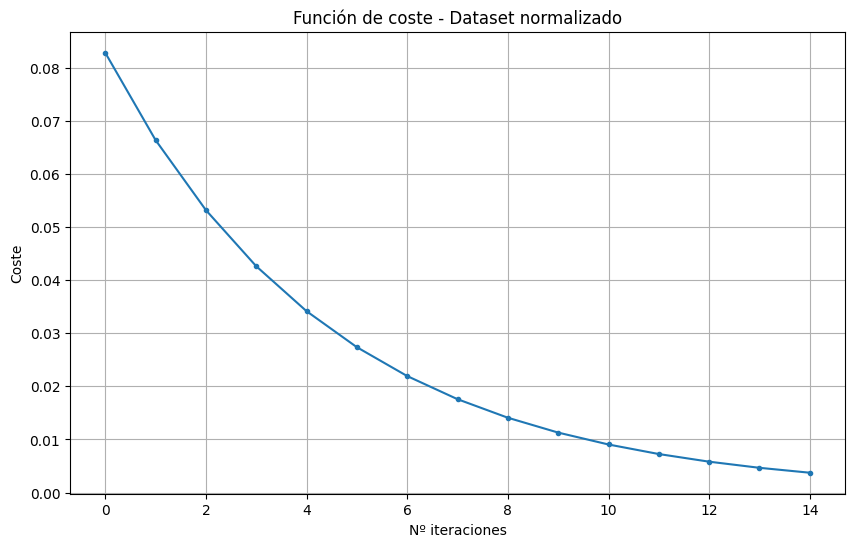

In [53]:
# TODO: Entrena un modelo de regresión lineal y representa gráficamente la evolución de su función de coste
# Usa la X normalizada
# Añádele el sufijo "_norm" a las variables Theta y j_hist que devuelve tu modelo

# TODO: Implementa la función de coste vectorizada siguiendo la siguiente plantilla
def cost_function(x, y, theta):
    """Computa la función de coste de manera vectorizada.

    Argumentos:
    x -- array 2D de Numpy, tamaño m x n
    y -- array 1D de Numpy, tamaño m
    theta -- array 1D de Numpy, tamaño n

    Devuelve:
    j -- float con el coste para theta
    """
    # número de ejemplos
    m = x.shape[0]

    # asegurar que theta sea un vector columna (n x 1) para multiplicación matricial
    theta = theta.reshape(-1, 1)  # ahora es n x 1

    # predecir todas las Y usando multiplicación matricial
    h = np.matmul(x, theta)

    # convertir y en vector columna si es necesario
    y = y.reshape(-1, 1)  # m x 1

    # calcular residuos (diferencia entre predicción y valores reales)
    residuos = h - y  # m x 1

    # elevar al cuadrado y sumar todos los residuos
    suma_cuadrados = np.sum(residuos**2)

    # coste final según la fórmula J(theta) = 1/(2*m) * sum((h-y)^2)
    j = suma_cuadrados / (2*m)

    # asegurar que devuelva float y no array 2D
    return float(j)

def gradient_descent(x, y, theta, alpha, e=1e-6, iter_=1000):
    iter_ = int(iter_)
    m, n = x.shape

    # Inicializa theta para el dataset no normalizado
    theta_norm = theta.copy()

    # Histórico de costes
    j_hist_norm = []

    for k in range(iter_):
        # Copia de theta para actualizar en esta iteración
        theta_iter = theta_norm.copy()

        for j in range(n):
            h = np.matmul(x, theta_norm)
            grad = (1/m) * np.sum((h - y) * x[:, j])
            theta_iter[j] = theta_norm[j] - alpha * grad

        # Actualiza theta para la siguiente iteración
        theta_norm = theta_iter

        cost = cost_function(x, y, theta_norm)
        j_hist_norm.append(cost)

        if k > 0 and abs(j_hist_norm[-1] - j_hist_norm[-2]) < e:
            print('Converge en la iteración nº: ', k)
            break
    else:
        print('Nº máx. de iteraciones alcanzado')

    return j_hist_norm, theta_norm

# Parámetros de entrenamiento
alpha = 1e-1
e = 1e-3
iter_ = 100



# Entrenamiento con dataset no normalizado
j_hist_norm, theta_final_norm = gradient_descent(X_norm, Y, Theta_verd, alpha, e=e, iter_=iter_)

# Representación gráfica
plt.figure(figsize=(10, 6))
plt.title('Función de coste - Dataset normalizado')
plt.xlabel('Nº iteraciones')
plt.ylabel('Coste')

plt.plot(range(len(j_hist_norm)), j_hist_norm, marker='o', linestyle='-', markersize=3)
plt.grid()
plt.show()


## Cuidado con la Theta original

Para el dataset original, antes de normalizarlo, se cumplía la relación $Y = X \times \Theta$.

Sin embargo, ahora hemos modificado la *X* de dicha función.

Por tanto, comprueba qué sucede si quieres volver a computar la *Y* usando la *X* normalizada:

Diferencias entre Y_norm e Y (primeras 10 filas):
[ 0.09201877 -0.08995658 -0.36067838 -0.02994564 -0.5861288   0.68496823
 -0.20880329  0.74935966  0.25263729 -0.18149339]


Text(0.5, 1.0, 'Diferencia entre Y original y Y usando X normalizada')

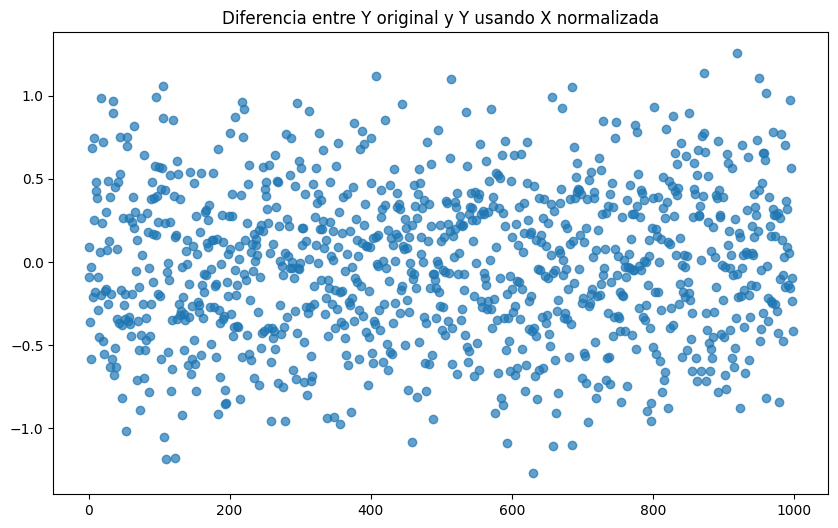

In [63]:
# TODO: Comprueba si hay diferencias entre la Y original y la Y usando la X normalizada

# Comprueba el valor de Y al multiplicar X_norm y Theta_verd
Y_norm = np.matmul(X_norm, Theta_verd)

# Comprueba si hay diferencias entre Y_norm e Y
diff = Y_norm - Y

print('Diferencias entre Y_norm e Y (primeras 10 filas):')
print(diff[:10])

# Representa en un gráfico de puntos la diferencia entre Ys vs X
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y)), diff, alpha=0.7)
plt.title('Diferencia entre Y original y Y usando X normalizada')

### Realizar predicciones

Del mismo modo, ¿qué sucede cuando vamos a utilizar el modelo para realizar predicciones?

Genera un nuevo conjunto de datos *X_pred* siguiendo el mismo método que usaste para el dataset *X* original, incorporando el término de bias, multiplicando sus características por un rango y sumándoles valores diferentes, sin normalizarlo finalmente.

También calcula su *Y_pred_verd* (sin término de error), como valor verdadero de *Y* a intentar predecir:

In [92]:
# TODO: Genera un nuevo dataset de menor nº de ejemplos e igual nº de características que el dataset original
# Asegúrate de que tiene una media o rango normalizado entre características/columnas

m = 500
n = 4

X_pred = np.random.uniform(-1, 1, size=(m, n))

X_pred = np.insert(X_pred, 0, values=np.ones(m), axis=1)

rangos = np.array([1e3, 1e-2, 1e5, 1e4])
medias = np.array([3, 20, 5, 4])

for i in range(n):
    X_pred[:, i+1] = X_pred[:, i+1] * rangos[i] + medias[i]

Y_pred_verd = np.matmul(X_pred, Theta_verd)

Ahora comprueba si habría alguna diferencia entre la *Y_pred_verd* y la *Y_pred* que predeciría tu modelo:

In [95]:
# TODO: Comprueba las diferencias entre la Y real y la Y predicha
# Parámetros de entrenamiento


Y_pred = np.matmul(X_pred, theta_final_norm)

diff = Y_pred_verd - Y_pred

print('Diferencias entre la Y real y la Y predicha:')
print(diff[:10])


Diferencias entre la Y real y la Y predicha:
[ 16399.56616902  -9446.60172794 -15631.77572527 -10067.90292363
   5962.67434513  -1662.93297286  16233.95961077  17274.4595113
  -6436.85323715  13849.34710949]


Dado que las predicciones no son correctas sino, deberíamos previamente normalizar la nueva *X_pred* antes de generar las predicciones:

In [96]:
# TODO: Normaliza la X_pred

X_pred[:, 1:] = normalize(X_pred[:, 1:], mu, std)

print(X_pred[:10,:])
print(X_pred.shape)

[[ 1.00000000e+00 -1.60044690e-01  7.15633591e-01  1.65755456e+03
   1.35604319e+02]
 [ 1.00000000e+00 -1.06748335e+00  1.72957554e+00 -9.95987551e+02
   1.58741298e+02]
 [ 1.00000000e+00 -2.24367004e-01 -1.23171018e+00 -1.56450841e+03
  -1.74379846e+02]
 [ 1.00000000e+00  1.14343656e+00  4.37171812e-01 -1.04569219e+03
  -3.57031249e+01]
 [ 1.00000000e+00  1.17203062e+00  1.28536917e+00  5.69628302e+02
   1.08176593e+02]
 [ 1.00000000e+00  2.73001777e-01 -9.07473277e-01 -1.90752489e+02
   6.11186126e+01]
 [ 1.00000000e+00  1.31525371e+00 -5.71494674e-01  1.68990086e+03
  -1.58209425e+02]
 [ 1.00000000e+00  1.30580176e+00 -5.90118235e-01  1.73115352e+03
   1.13474405e+02]
 [ 1.00000000e+00  1.15188371e+00 -3.68790907e-01 -6.50484937e+02
  -1.23888399e+02]
 [ 1.00000000e+00 -1.20687360e+00 -1.53423187e+00  1.47645325e+03
  -1.35470049e+02]]
(500, 5)


En esta ocasión no hemos generado una nueva variable diferente al normalizar, sino que sigue siendo la variable *X_pred*.

Así puedes reejecutar la celda anterior para, ahora que *X_pred* está normalizada, comprobar si hay alguna diferencia entre la *Y* real y la *Y* predicha.

Por tanto, recuerda siempre:
- La *theta* calculada al entrenar el modelo será relativa siempre al dataset normalizado, y no se podrá usar para el dataset original, ya que a igual *Y* y distinta *X*, *Theta* debe cambiar.
- Para hacer predicciones sobre nuevos ejemplos, antes tenemos que normalizarlos también, usando los mismos valores de medias y desviaciones típicas que usamos originalmente para entrenar el modelo.